In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os
from skimage import io

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
# filter warnings
warnings.filterwarnings('ignore')


import os
print(os.listdir("../input"))
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

['fruits-360_dataset', 'fruits-360-original-size']

fruits-360-original-size

fruits-360_dataset




In [63]:
import os, os.path
os.listdir('../input/fruits-360_dataset/fruits-360/Training')

['Quince',
 'Grapefruit White',
 'Granadilla',
 'Orange',
 'Apple Red 3',
 'Grape White 2',
 'Corn Husk',
 'Tamarillo',
 'Banana Red',
 'Nectarine Flat',
 'Pepper Yellow',
 'Nut Forest',
 'Pear Monster',
 'Fig',
 'Tomato Heart',
 'Onion Red Peeled',
 'Lemon Meyer',
 'Onion Red',
 'Passion Fruit',
 'Cucumber Ripe',
 'Cactus fruit',
 'Tomato not Ripened',
 'Mango Red',
 'Apple Pink Lady',
 'Pomegranate',
 'Plum',
 'Pineapple',
 'Tomato 1',
 'Cherry 2',
 'Apple Red 2',
 'Avocado ripe',
 'Dates',
 'Maracuja',
 'Papaya',
 'Nut Pecan',
 'Pear Stone',
 'Cherry Wax Yellow',
 'Eggplant',
 'Apple Golden 2',
 'Guava',
 'Beetroot',
 'Tomato Maroon',
 'Potato Red',
 'Apple Red Delicious',
 'Cherry Wax Red',
 'Kiwi',
 'Cherry Wax Black',
 'Limes',
 'Cantaloupe 2',
 'Apple Braeburn',
 'Pear',
 'Carambula',
 'Tomato 3',
 'Onion White',
 'Cherry 1',
 'Strawberry',
 'Lychee',
 'Redcurrant',
 'Rambutan',
 'Potato Red Washed',
 'Tomato 4',
 'Hazelnut',
 'Tomato Yellow',
 'Plum 3',
 'Grape White',
 'Pineap

In [64]:
np.random.seed(1234)
directory='../input/fruits-360_dataset/fruits-360/Training/'
classes=["Apple Crimson Snow","Banana","Blueberry","Cauliflower","Cherry 1","Corn","Dates",
         "Mango","Raspberry"]

train_set=[]
train_samples = []
for i in os.listdir('../input/fruits-360_dataset/fruits-360/Training'):
    train_set.append(i)
    train_samples.append(len(os.listdir('../input/fruits-360_dataset/fruits-360/Training/'+ i)))

all_arrays=[]
img_size=100
for i in classes:
    path=os.path.join(directory,i)
    class_num=classes.index(i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        edges_array = cv2.Canny(img_array, 100, 200)
        all_arrays.append([img_array, edges_array, class_num])

In [65]:
os.listdir('../input/fruits-360_dataset/fruits-360/Test')

['Quince',
 'Grapefruit White',
 'Granadilla',
 'Orange',
 'Apple Red 3',
 'Grape White 2',
 'Corn Husk',
 'Tamarillo',
 'Banana Red',
 'Nectarine Flat',
 'Pepper Yellow',
 'Nut Forest',
 'Pear Monster',
 'Fig',
 'Tomato Heart',
 'Onion Red Peeled',
 'Lemon Meyer',
 'Onion Red',
 'Passion Fruit',
 'Cucumber Ripe',
 'Cactus fruit',
 'Tomato not Ripened',
 'Mango Red',
 'Apple Pink Lady',
 'Pomegranate',
 'Plum',
 'Pineapple',
 'Tomato 1',
 'Cherry 2',
 'Apple Red 2',
 'Avocado ripe',
 'Dates',
 'Maracuja',
 'Papaya',
 'Nut Pecan',
 'Pear Stone',
 'Cherry Wax Yellow',
 'Eggplant',
 'Apple Golden 2',
 'Guava',
 'Beetroot',
 'Tomato Maroon',
 'Potato Red',
 'Apple Red Delicious',
 'Cherry Wax Red',
 'Kiwi',
 'Cherry Wax Black',
 'Limes',
 'Cantaloupe 2',
 'Apple Braeburn',
 'Pear',
 'Carambula',
 'Tomato 3',
 'Onion White',
 'Cherry 1',
 'Strawberry',
 'Lychee',
 'Redcurrant',
 'Rambutan',
 'Potato Red Washed',
 'Tomato 4',
 'Hazelnut',
 'Tomato Yellow',
 'Plum 3',
 'Grape White',
 'Pineap

In [66]:
directory2="../input/fruits-360_dataset/fruits-360/Test"
classes2=["Apple Crimson Snow","Banana","Blueberry","Cauliflower","Cherry 1","Corn","Dates",
         "Mango","Raspberry"]

test_set = []
test_samples = []
for i in os.listdir("../input/fruits-360_dataset/fruits-360/Test/"):
    test_set.append(i)
    test_samples.append(len(os.listdir("../input/fruits-360_dataset/fruits-360/Test/"+ i)))

all_arrays2=[]
img_size=100
for i in classes2:
    path=os.path.join(directory2,i)
    class_num2=classes2.index(i)
    for img in os.listdir(path):
        img_array2=cv2.imread(os.path.join(path,img))
        img_array2=cv2.cvtColor(img_array2, cv2.COLOR_BGR2RGB)
        edges_array2 = cv2.Canny(img_array, 100, 200)
        all_arrays.append([img_array2, edges_array2, class_num2])

        


### Image examples of the data

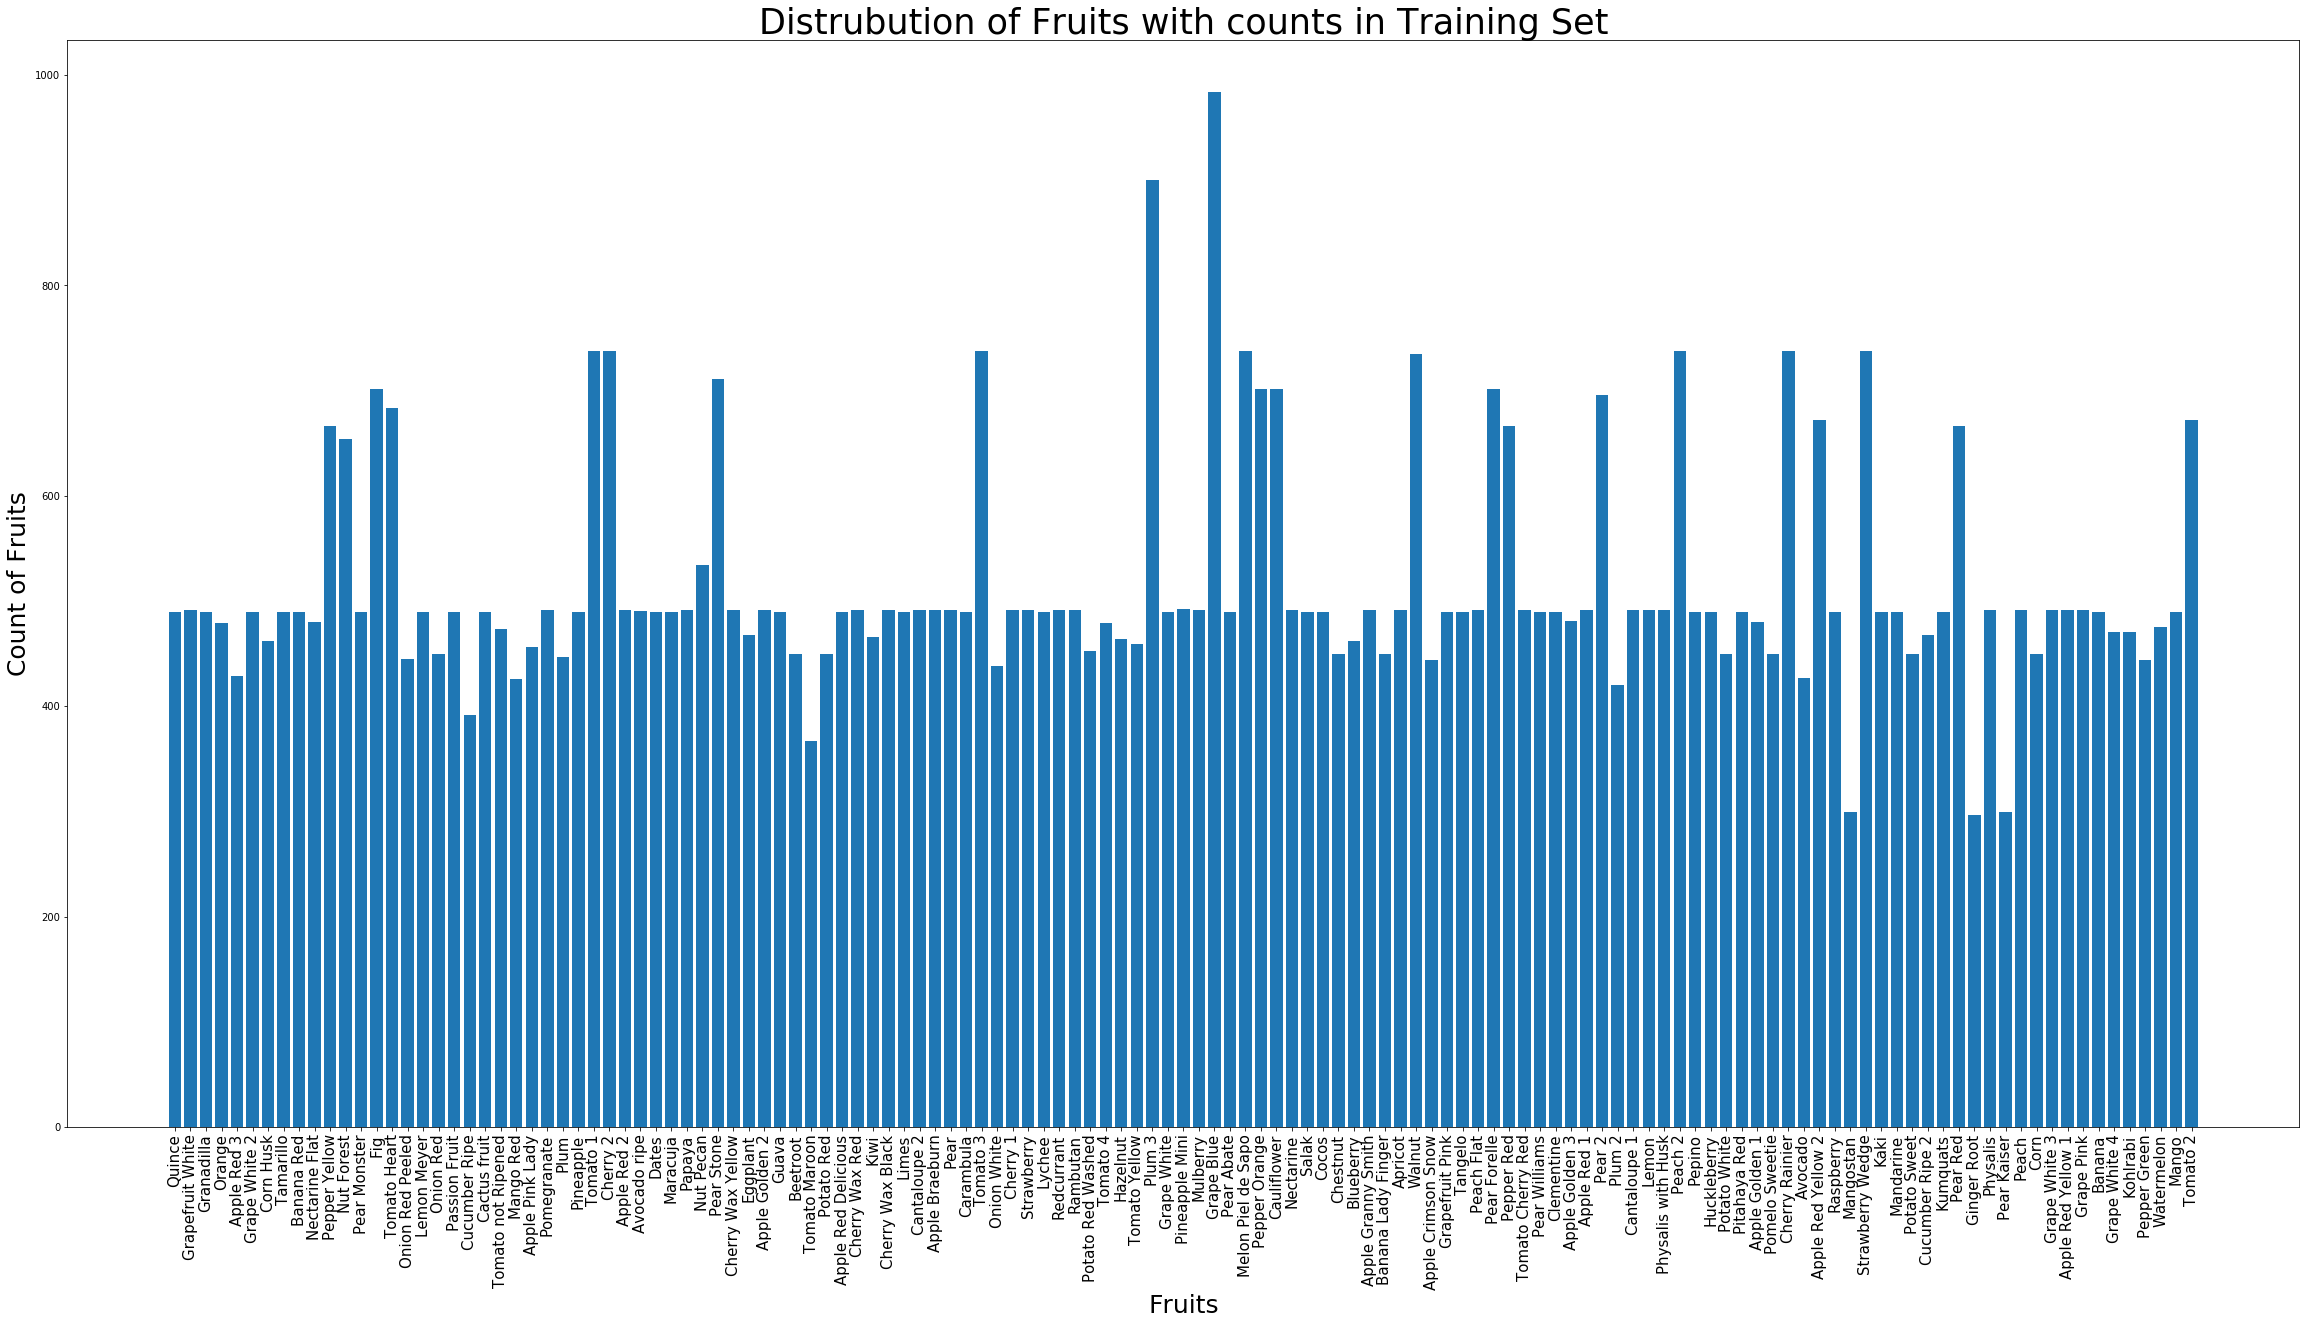

In [67]:
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 40
figure_size[1] = 20
plt.rcParams["figure.figsize"] = figure_size
index = np.arange(len(train_set))
plt.bar(index,train_samples )
plt.xlabel('Fruits', fontsize=25)
plt.ylabel('Count of Fruits', fontsize=25)
plt.xticks(index,train_set, fontsize=15, rotation=90)
plt.title('Distrubution of Fruits with counts in Training Set', fontsize=35)
plt.show()

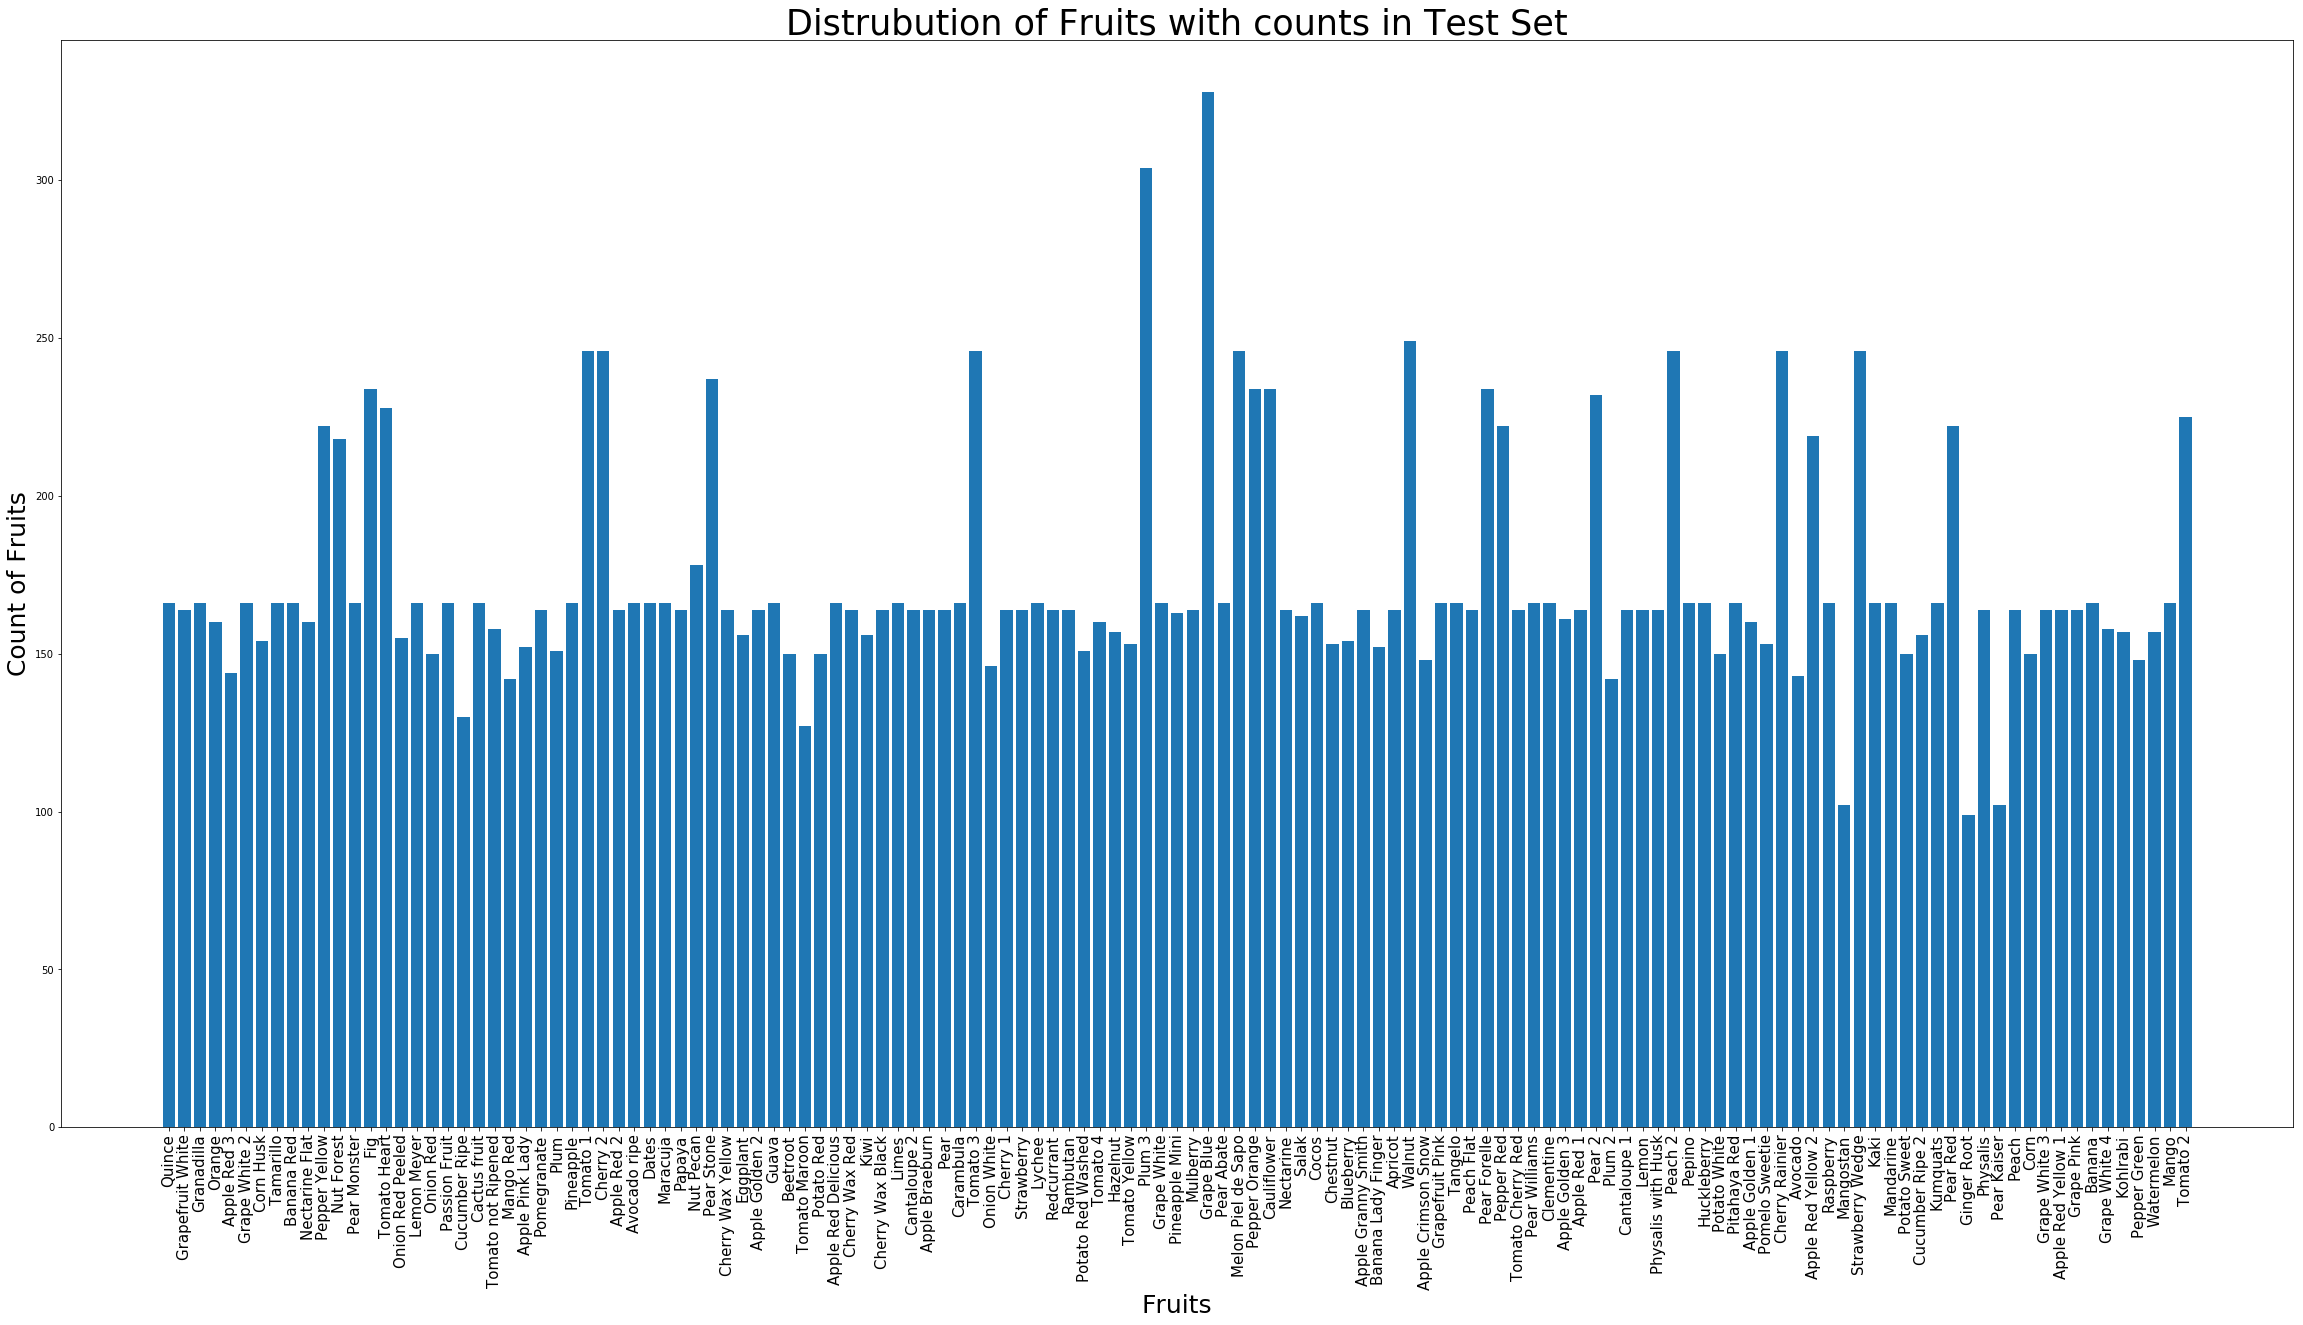

In [68]:
index2 = np.arange(len(test_set))
plt.bar(index2, test_samples)
plt.xlabel('Fruits', fontsize=25)
plt.ylabel('Count of Fruits', fontsize=25)
plt.xticks(index2, test_set, fontsize=15, rotation=90)
plt.title('Distrubution of Fruits with counts in Test Set', fontsize=35)
plt.show()

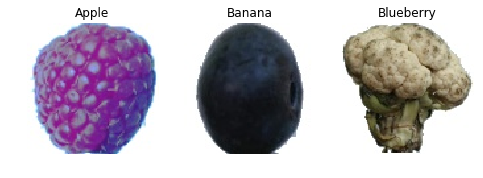

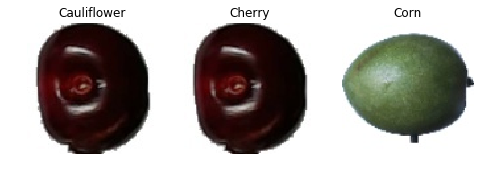

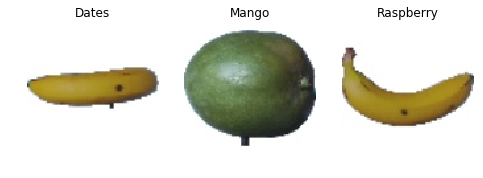

In [84]:
fruits_array_train=[]
for img_array, edges_array, class_num in all_arrays:
    fruits_array_train.append(img_array)

location=[[1,500,1150],[1500,2500,3000],[3500,4000,4500]]
fruit_names=["Apple","Banana","Blueberry","Cauliflower","Cherry","Corn","Dates","Mango","Raspberry"]
a=0
b=1
c=2
for i,j,k in location:
    plt.subplots(figsize=(8,8))
    plt.subplot(1,3,1)
    plt.imshow(fruits_array_train[i])
    plt.title(fruit_names[a])
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(fruits_array_train[j])
    plt.title(fruit_names[b])
    plt.axis("off")
    plt.subplot(1,3,3)
    plt.imshow(fruits_array_train[k])
    plt.title(fruit_names[c])
    plt.axis("off")
    a+=3
    b+=3
    c+=3


In [72]:
import random
random.shuffle(all_arrays)
random.shuffle(all_arrays2)

X_train=[]
Y_train_clf=[]
Y_train_reg=[]
for features, edges, label in all_arrays:
    X_train.append(features)
    Y_train_clf.append(label)
    Y_train_reg.append(np.mean(edges))  # regression target is the mean of the edges
X_train=np.array(X_train) #arraying

X_test=[]
Y_test_clf=[]
Y_test_reg=[]
for features, label in all_arrays2:
    X_test.append(features)
    Y_test_clf.append(label)
    edges_array = cv2.Canny(features, 100, 200)
    Y_test_reg.append(np.mean(edges_array))  # regression target is the mean of the edges
X_test=np.array(X_test) #arraying

In [73]:
# Normalization and reshaping
X_train=X_train.reshape(-1,img_size,img_size,3)
X_train=X_train/255
X_test=X_test.reshape(-1,img_size,img_size,3)
X_test=X_test/255
print("shape of X_train= ",X_train.shape)
print("shape of X_test=  ",X_test.shape)

shape of X_train=  (4511, 100, 100, 3)

shape of X_test=   (1514, 100, 100, 3)


While reshaping we added RGB scale.

In [74]:
from keras.utils import to_categorical
Y_train_clf=to_categorical(Y_train_clf,num_classes=9)
Y_test_clf=to_categorical(Y_test_clf,num_classes=9)

In [75]:
Y_train_clf.shape

(4511, 9)

In [76]:
X_train.shape

(4511, 100, 100, 3)

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train_clf, y_val_clf, y_train_reg, y_val_reg = train_test_split(X_train, Y_train_clf, Y_train_reg, test_size=0.2, random_state=42)

### Data augmentation has been performed. In this section I have added different shapes of the images. I will use **zooming,shifting,rotating,fliping** methods in order to avoid **overfitting**.                                                             
### For example I have added an image of banana with 5 degrees rotated.

In [78]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, concatenate

# input layer
input_layer = Input(shape=(img_size, img_size, 3))

# convolutional layer 1
conv1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

# convolutional layer 2
conv2 = Conv2D(64, (3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

# flatten layer
flatten = Flatten()(pool2)

# dense layers for classification
dense_clf1 = Dense(128, activation='relu')(flatten)
dropout_clf1 = Dropout(0.5)(dense_clf1)
dense_clf2 = Dense(64, activation='relu')(dropout_clf1)
dropout_clf2 = Dropout(0.5)(dense_clf2)
dense_clf3 = Dense(9, activation='softmax', name='classification')(dropout_clf2)

# dense layers for regression
dense_reg1 = Dense(128, activation='relu')(flatten)
dropout_reg1 = Dropout(0.5)(dense_reg1)
dense_reg2 = Dense(64, activation='relu')(dropout_reg1)
dropout_reg2 = Dropout(0.5)(dense_reg2)
dense_reg3 = Dense(1, name='regression')(dropout_reg2)

# combine the two outputs
model = Model(inputs=input_layer, outputs=[dense_clf3, dense_reg3])

# compile the model with classification and regression losses
model.compile(optimizer='adam', loss={'classification': 'categorical_crossentropy', 'regression': 'mse'}, metrics={'classification': 'accuracy', 'regression': 'mae'})

### After 30 iteration we have a high accuracy around 97%

In [79]:
history = model.fit(
    x=x_train,
    y={'classification': y_train_clf, 'regression': np.array(y_train_reg)}, 
    validation_data=(x_val, {'classification': y_val_clf, 'regression': np.array(y_val_reg)}), 
    epochs=20, 
    batch_size=64
)

Train on 3608 samples, validate on 903 samples

Epoch 1/20

3608/3608 [==============================] - 33s 9ms/step - loss: 243.5559 - classification_loss: 2.1236 - regression_loss: 241.4324 - classification_acc: 0.2148 - regression_mean_absolute_error: 11.3675 - val_loss: 54.9259 - val_classification_loss: 1.4488 - val_regression_loss: 53.4771 - val_classification_acc: 0.4961 - val_regression_mean_absolute_error: 5.3989

Epoch 2/20

3608/3608 [==============================] - 32s 9ms/step - loss: 81.4437 - classification_loss: 1.3547 - regression_loss: 80.0890 - classification_acc: 0.4753 - regression_mean_absolute_error: 6.3304 - val_loss: 9.3051 - val_classification_loss: 0.6167 - val_regression_loss: 8.6884 - val_classification_acc: 0.8859 - val_regression_mean_absolute_error: 2.3004

Epoch 3/20

3608/3608 [==============================] - 33s 9ms/step - loss: 71.7218 - classification_loss: 0.8457 - regression_loss: 70.8761 - classification_acc: 0.6932 - regression_mean_absolut

In [80]:
# Evaluate the model
score = model.evaluate(X_test, {'classification': Y_test_clf, 'regression': np.array(Y_test_reg)}, verbose=0)

# Print the test accuracy and loss for both classification and regression
print('Test Classification Accuracy:', score[3])
print('Test Classification Loss:', score[1])
print('Test Regression MAE:', score[4])
print('Test Regression Loss:', score[2])


Test Classification Accuracy: 0.9141347424042272

Test Classification Loss: 0.34183475434844096

Test Regression MAE: 2.94859010540195

Test Regression Loss: 17.857305887038358


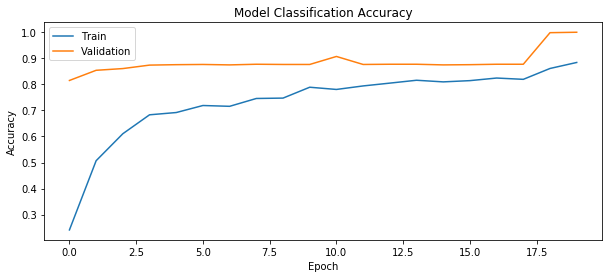

In [39]:
# Plotting accuracy
plt.figure(figsize=(10,4))
plt.plot(history.history['classification_acc'])
plt.plot(history.history['val_classification_acc'])
plt.title('Model Classification Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


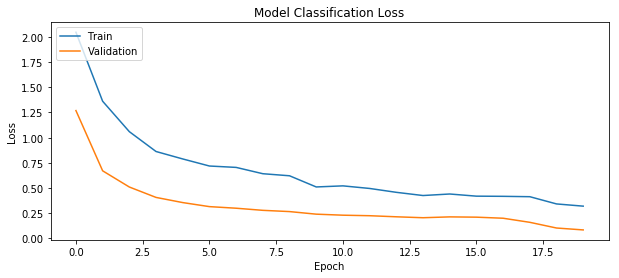

In [40]:
# Plotting loss
plt.figure(figsize=(10,4))
plt.plot(history.history['classification_loss'])
plt.plot(history.history['val_classification_loss'])
plt.title('Model Classification Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

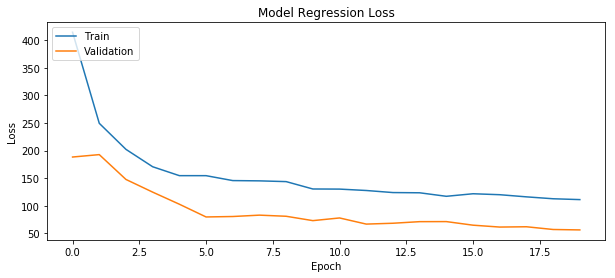

In [41]:
# Plotting regression loss
plt.figure(figsize=(10,4))
plt.plot(history.history['regression_loss'])
plt.plot(history.history['val_regression_loss'])
plt.title('Model Regression Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

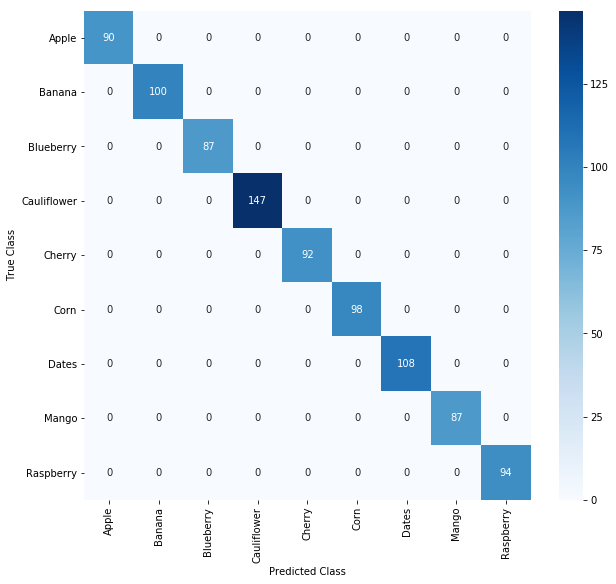

In [91]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# get the predictions for the validation set
y_pred_clf, _ = model.predict(x_val)

# convert the predictions to class labels
y_pred_clf_labels = np.argmax(y_pred_clf, axis=1)
y_true_clf_labels = np.argmax(y_val_clf, axis=1)

# compute the confusion matrix
cm = confusion_matrix(y_true_clf_labels, y_pred_clf_labels)
fruit_names = ["Apple", "Banana", "Blueberry", "Cauliflower", "Cherry", "Corn", "Dates", "Mango", "Raspberry"]
plt.figure(figsize=(10,9))
sns.heatmap(cm , annot=True, cmap='Blues', fmt='.0f', xticklabels=fruit_names, yticklabels=fruit_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


In [ ]:
#confusion matrix
y_pred2=model.predict(X_test)
y_pred_classes2=np.argmax(y_pred2,axis=1)
y_true2=np.argmax(Y_test,axis=1)
#compute conf mat
conf_mat2=confusion_matrix(y_true2,y_pred_classes2)
#plot the con mat
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat2,annot=True,cmap=plt.cm.Blues,fmt=".0f")
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()


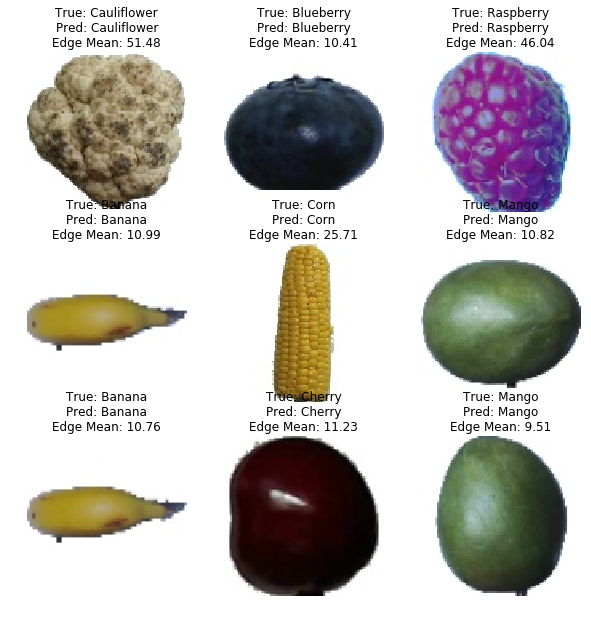

In [94]:
# Let's visualize test prediction.
y_pred_clf, y_pred_reg = model.predict(X_test)

# convert the predictions to class labels
y_pred_clf_labels = np.argmax(y_pred_clf, axis=1)
y_true_clf_labels = np.argmax(Y_test_clf, axis=1)

# plot the test predictions
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(X_test[i])
    ax.axis('off')
    title = "True: {}\nPred: {}".format(fruit_names[y_true_clf_labels[i]], fruit_names[y_pred_clf_labels[i]])
    title += "\nEdge Mean: {:.2f}".format(y_pred_reg[i][0])
    ax.set_title(title)
plt.show()

